## I. Importing Libraries and Pulling Dataset into the Notebook

In [3]:

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading data and working on it (tabular and numerical)

import pandas as pd
import numpy as np

# Libraries to perform statistical analysis
import scipy.stats as stats
import sklearn

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# statemodels
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To build logistic regression model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/machine learng for mental health/Input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
# Loading the survey into out notebook
mhdata = pd.read_csv('./survey.csv')

## II. EDA and Data Preparation

In [5]:
# Checking the dimensions of our data
mhdata.shape

(1259, 27)

We have 27 columns and 1,259 entries from the survey

In [6]:
# Taking a peak at the first five entries in our dataset
mhdata.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
# Checking for data types of each attribute
mhdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

It seems that all attributes are objects based on the nature of the data. This is correct but this will be hard to work a model on. This will be explained later on.

### Cleaning the Data
We are aware that surveys may not give out the best results for uniformity, so we will take extra steps to clean the data and make it uniform

In [8]:
# Checking for missing values
mhdata.isna().apply(pd.value_counts).T


,False,True
Timestamp,1259.0,NaN
Age,1259.0,NaN
Gender,1259.0,NaN
Country,1259.0,NaN
state,744.0,515.0
self_employed,1241.0,18.0
family_history,1259.0,NaN
treatment,1259.0,NaN
work_interfere,995.0,264.0
no_employees,1259.0,NaN


In [9]:
# Checking for duplicates in the dataset
mhdata.duplicated().any()

False

No duplicated entries are present in the set

In [10]:
# Dropping columns not needed/ not useful for EDA and modeling
mhdata.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

In [11]:
# Renaming columns for uniformity and ease of understanding. We like uniformity!
mhdata.rename({'self_employed' : 'Self_Employed', 'family_history' : 'Family_History',
           'treatment' : 'Treatment', 'work_interfere' : 'Work_Interfere',
           'no_employees': 'Employee_Count_Company', 'remote_work': 'Remote_Work', 'tech_company': 'Tech_Company',
           'benefits': 'Benefits', 'care_options': 'Care_Options', 'wellness_program': 'Wellness_Program',
           'seek_help': 'Seek_Help', 'anonymity': 'Anonymity', 'leave': 'Medical_Leave',
           'mental_health_consequence': 'Mental_Health_Consequence',
           'phys_health_consequence': 'Physical_Health_Consequence', 'coworkers': 'Coworkers_Reach',
           'supervisor': 'Supervisor_Reach', 'mental_health_interview': 'Mental_Health_Interview',
           'phys_health_interview': 'Physical_Health_Interview', 'mental_vs_physical': 'Mental_VS_Physical',
           'obs_consequence': 'Observed_Consequence_Workplace'} , inplace = True , axis = 1)

In [12]:
# Checking the entries for age
mhdata['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

We have ages that are off (negative and immortal numbers). Let's fix them by imputing.

In [13]:
# calculating the median age
median_age = mhdata['Age'].median()
print(median_age)

31.0


In [14]:
# since some of data are impossible to work with, we will replace impossible values with the median age
mhdata['Age'].replace([mhdata['Age'][mhdata['Age'] < 15]], median_age, inplace = True)
mhdata['Age'].replace([mhdata['Age'][mhdata['Age'] > 100]], median_age, inplace = True)

mhdata['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72], dtype=int64)

Replacing impossible values with the median age was our call to use instead of np.nan since we want to avoid missing values in our dataset. Using the median age preserves the central tendency of the data and minimizes the impact of outliers. Here, we set a limit to <15 (minimum working age according to International Labor Organization [ILO] standards) and >100 to avoid outliers

In [15]:
# Checking the entries for gender
mhdata['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [16]:
# We will only limit our analysis to three categories
mhdata['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

mhdata['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

mhdata["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Queer', inplace = True)

In [17]:
mhdata['Gender'].value_counts()

Gender
Male      991
Female    247
Queer      21
Name: count, dtype: int64

With that fixed, we identify 991 entries from male respondents, 247 entries from female respondents, and 21 entries from queer respondents

In [18]:
# we want to make sure that the answers are limited to boolean-like values
columns_to_print = ['Self_Employed', 'Family_History','Treatment', 'Work_Interfere', 'Employee_Count_Company', 'Remote_Work',
                    'Tech_Company', 'Benefits', 'Care_Options', 'Wellness_Program',
                    'Seek_Help', 'Anonymity', 'Medical_Leave', 'Mental_Health_Consequence',
                    'Physical_Health_Consequence', 'Coworkers_Reach', 'Supervisor_Reach',
                    'Mental_Health_Interview', 'Physical_Health_Interview', 'Mental_VS_Physical',
                    'Observed_Consequence_Workplace']

for column in columns_to_print:
    print(f"{column}:")
    print(mhdata[column].value_counts())
    print()

Self_Employed:
Self_Employed
No     1095
Yes     146
Name: count, dtype: int64

Family_History:
Family_History
No     767
Yes    492
Name: count, dtype: int64

Treatment:
Treatment
Yes    637
No     622
Name: count, dtype: int64

Work_Interfere:
Work_Interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

Employee_Count_Company:
Employee_Count_Company
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: count, dtype: int64

Remote_Work:
Remote_Work
No     883
Yes    376
Name: count, dtype: int64

Tech_Company:
Tech_Company
Yes    1031
No      228
Name: count, dtype: int64

Benefits:
Benefits
Yes           477
Don't know    408
No            374
Name: count, dtype: int64

Care_Options:
Care_Options
No          501
Yes         444
Not sure    314
Name: count, dtype: int64

Wellness_Program:
Wellness_Program
No            842
Yes           229
Don't know   

### EDA
#### Target Variable - Treatment

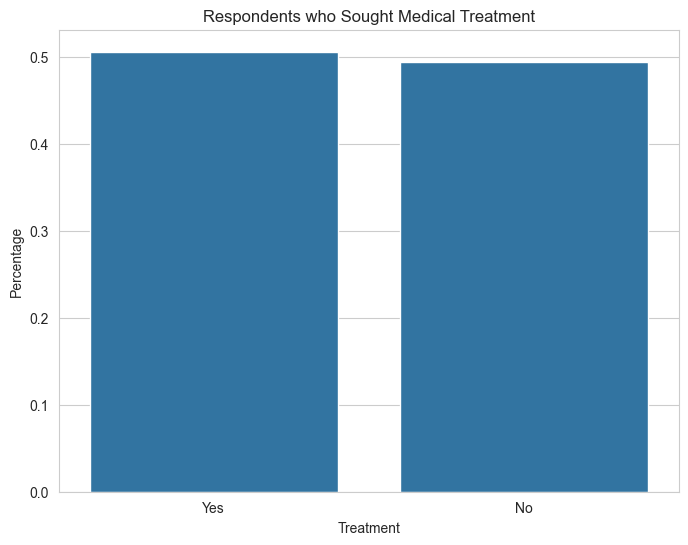

In [19]:
# Chart for whether respondent sought medical treatment or not
sns.set_style("whitegrid")
plt.figure(figsize = (8,6))
eda_percentage = mhdata['Treatment'].value_counts(normalize = True).rename_axis('Treatment').reset_index(name = 'Percentage')
sns.barplot(x = 'Treatment', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Respondents who Sought Medical Treatment')
plt.show()

#### Respondent Demography with Respect to Target

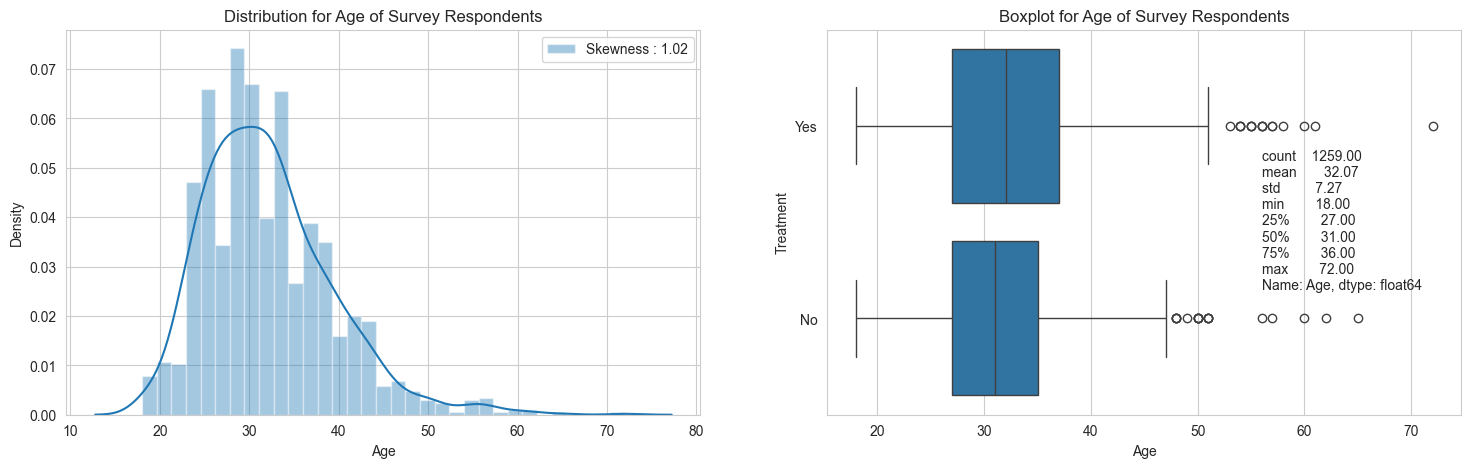

In [20]:
# Chart for Age
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.distplot(mhdata['Age'], label = 'Skewness : %.2f'%(mhdata['Age'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Age of Survey Respondents')
plt.subplot(1,2,2)
sns.boxplot(x = "Age", y = "Treatment", data = mhdata)
plt.title('Boxplot for Age of Survey Respondents')
age = str(mhdata['Age'].describe().round(2))
plt.text(56, 0.85, age)
plt.show()

Distribution and Boxplot has been called to check the profile of the surveyees.

* Results show that age attribute is skewed to the right. We have the highest age at 72 and lowest at 18, the skewness indicates that majority of the tech employees are the young generations ranging from their 20s to late 30s; assuming mid to senior level positions in the tech industry.
* The boxplot figure presents tech employees that seek medical treatment have much diverse age group, while the group of respondents who did NOT seek medical treatment have a younger range. Both factors are not that significant.

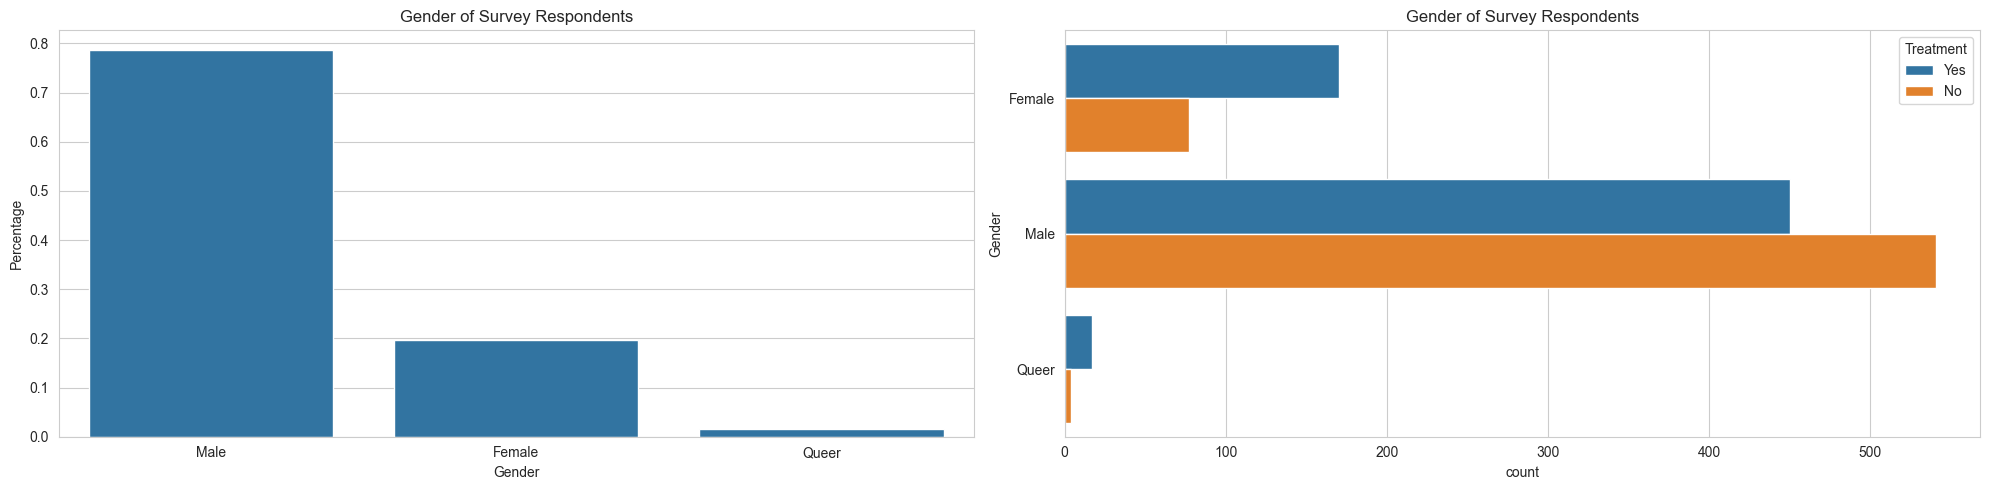

In [21]:
# Chart for Gender
plt.figure(figsize = (20, 5))

# Bar plot for Gender distribution
plt.subplot(1, 2, 1)
eda_percentage = mhdata['Gender'].value_counts(normalize=True).rename_axis('Gender').reset_index(name='Percentage')
sns.barplot(x = 'Gender', y = 'Percentage', data=eda_percentage.head(10))
plt.title('Gender of Survey Respondents')

# Count plot for Gender with hue by Treatment
plt.subplot(1, 2, 2)
sns.countplot(y = mhdata['Gender'], hue=mhdata['Treatment'])
plt.title('Gender of Survey Respondents')

plt.tight_layout()
plt.show()

Majority of the surveyees are Male at more than 75%. Male respondents are more likely not to seek medical treatment for mental health compared to other genders.

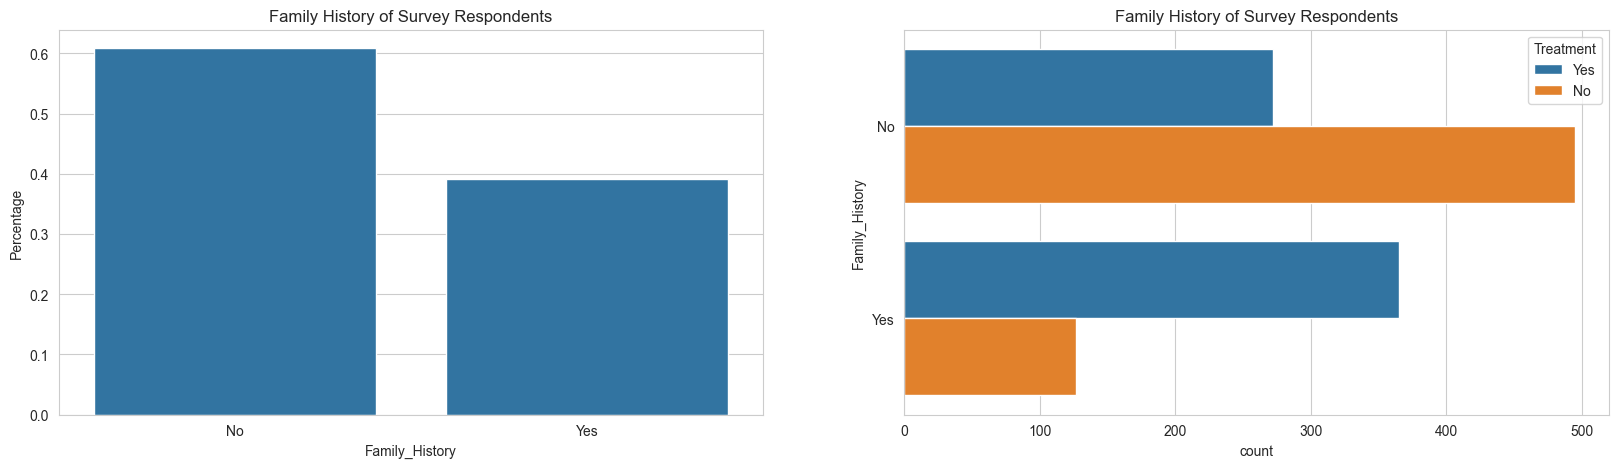

In [22]:
# Chart for Family History
plt.figure(figsize = (20,5))

# Bar plot for Family History distribution
plt.subplot(1,2,1)
eda_percentage = mhdata['Family_History'].value_counts(normalize = True).rename_axis('Family_History').reset_index(name = 'Percentage')
sns.barplot(x = 'Family_History', y = 'Percentage', data = eda_percentage)
plt.title('Family History of Survey Respondents')

# Count plot for Family History with hue by Treatment
plt.subplot(1,2,2)
sns.countplot(y = mhdata['Family_History'], hue = mhdata['Treatment'])
plt.title('Family History of Survey Respondents')
plt.show()

Majority of the survey respondents recorded that they don't have a family history of mental health conditions; and respondents who said they have a family history are more likely to seek medical treatment.

#### Working Conditions with Respect to Target

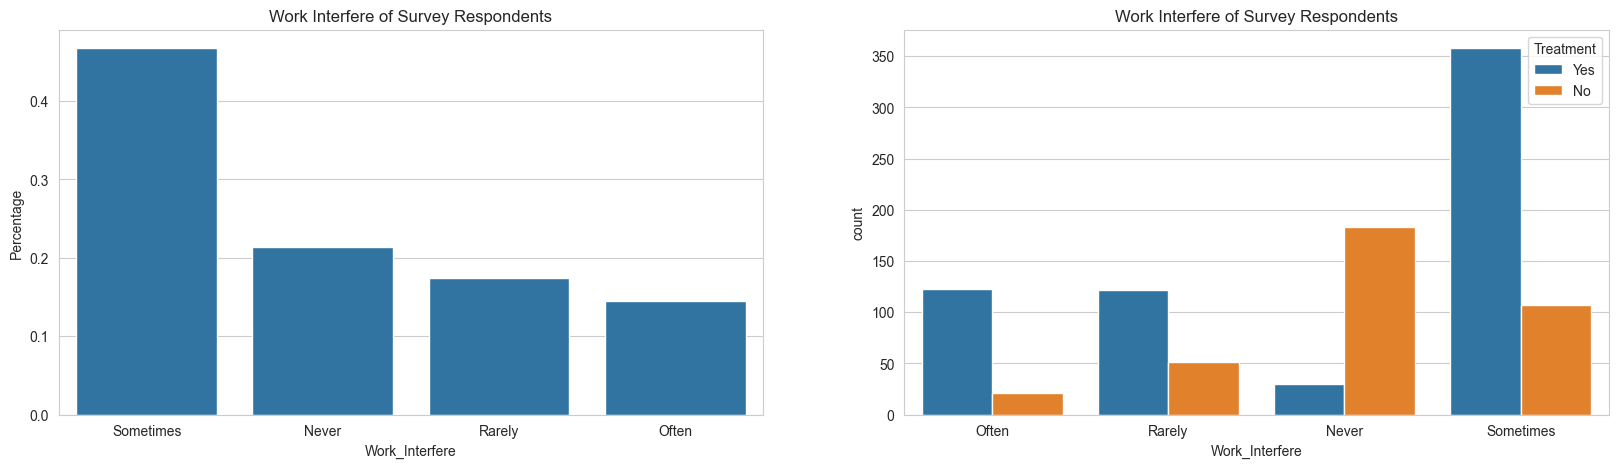

In [23]:
# Chart for Work Interference (of mental health)
plt.figure(figsize = (20,5))

# Bar plot for Work Interference distribution
plt.subplot(1,2,1)
eda_percentage = mhdata['Work_Interfere'].value_counts(normalize = True).rename_axis('Work_Interfere').reset_index(name = 'Percentage')
sns.barplot(x = 'Work_Interfere', y = 'Percentage', data = eda_percentage)
plt.title('Work Interfere of Survey Respondents')

# Count plot for Work Interference with hue by Treatment
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Work_Interfere'], hue = mhdata['Treatment'])
plt.title('Work Interfere of Survey Respondents')
plt.show()

Survey reveals that more than 40% of the response say that mental health sometimes interfere with work, with more than 10% of the survey say that it affects them often. Around 20% of the answers reveal that mental health does not affect their work. Regardless of the medical and psychological implication of the responses, it is revealed that surveyees who say that mental health does interfere with work at any degree are more likely to seek medical treatment than those who say that it doesn't interfere with their work.

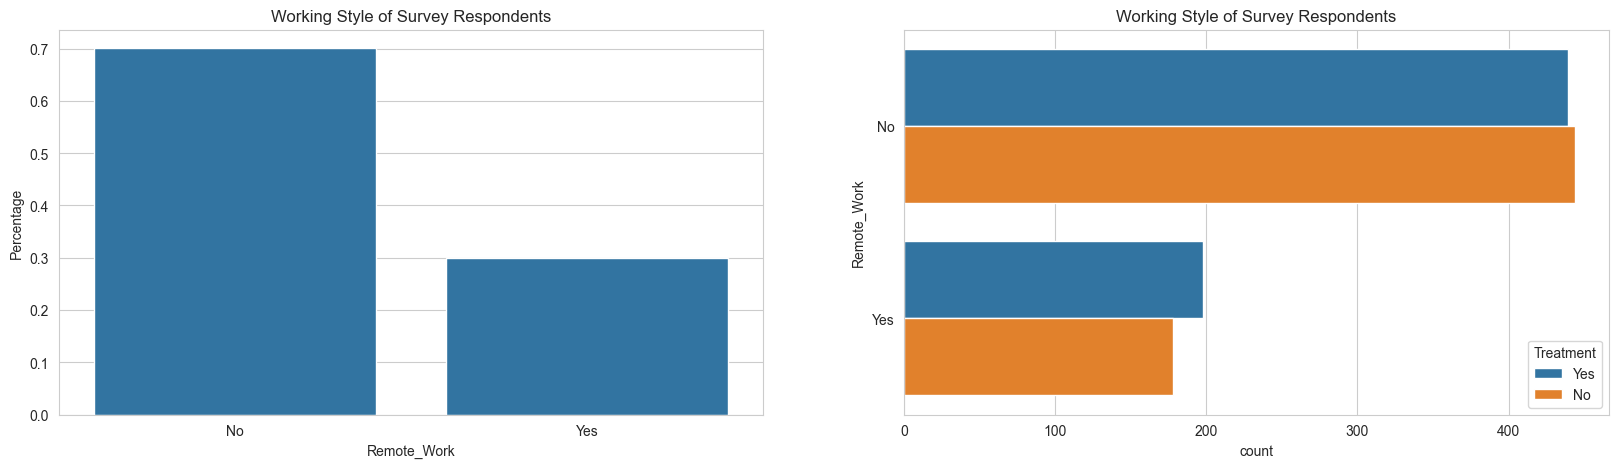

In [24]:
# Same comment as the previous ones. This will be the last comment for EDA
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Remote_Work'].value_counts(normalize = True).rename_axis('Remote_Work').reset_index(name = 'Percentage')
sns.barplot(x = 'Remote_Work', y = 'Percentage', data = eda_percentage)
plt.title('Working Style of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(y = mhdata['Remote_Work'], hue = mhdata['Treatment'])
plt.title('Working Style of Survey Respondents')
plt.show()

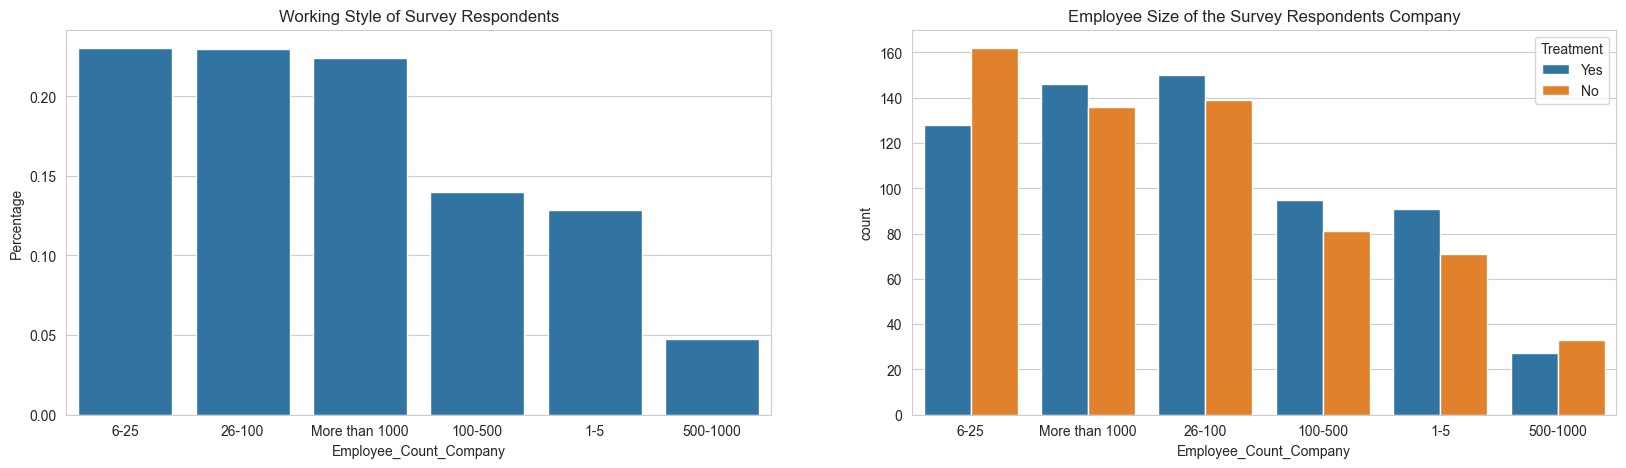

In [25]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Employee_Count_Company'].value_counts(normalize = True).rename_axis('Employee_Count_Company').reset_index(name = 'Percentage')
sns.barplot(x = 'Employee_Count_Company', y = 'Percentage', data = eda_percentage)
plt.title('Working Style of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Employee_Count_Company'], hue = mhdata['Treatment'])
plt.title('Employee Size of the Survey Respondents Company')
plt.show()


There is no significant pattern with regard to employee size of the company where the respondents are working for and getting a treatment.

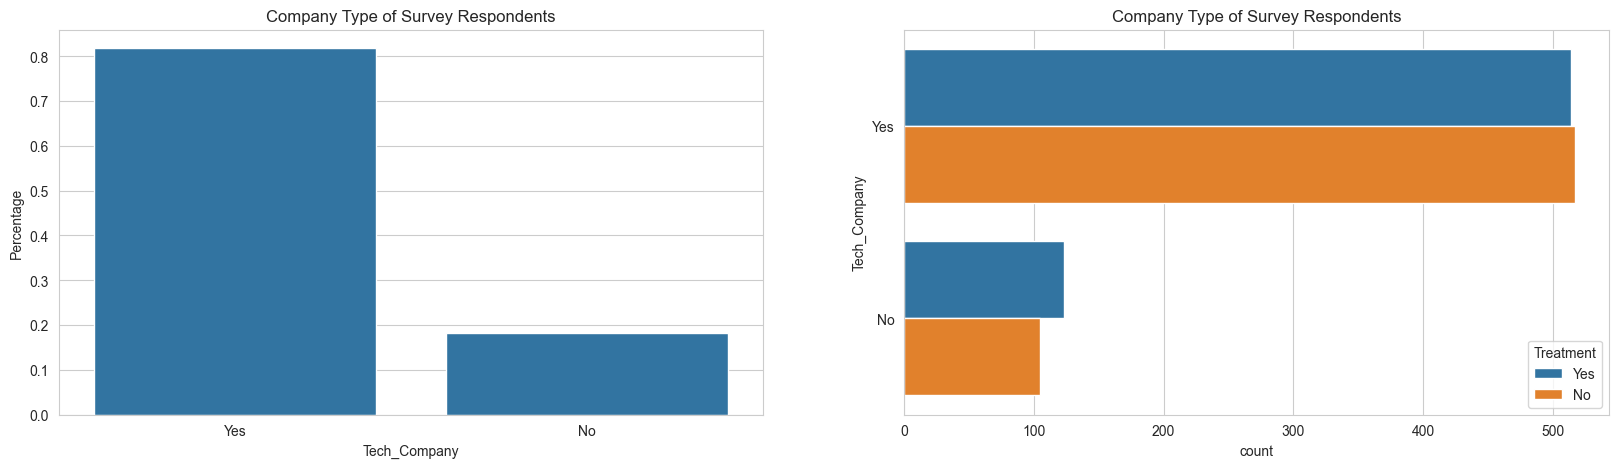

In [26]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Tech_Company'].value_counts(normalize = True).rename_axis('Tech_Company').reset_index(name = 'Percentage')
sns.barplot(x = 'Tech_Company', y = 'Percentage', data = eda_percentage)
plt.title('Company Type of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(y = mhdata['Tech_Company'], hue = mhdata['Treatment'])
plt.title('Company Type of Survey Respondents')
plt.show()

Around 18% of the surveyees reveal that they are not with a company that is primarily in the tech field. It also shows that they are more likely to get treatment than those who are working for at a tech company. There are many factors that are at play here. This could also imply that non-tech companies also face a mental health issue among their employees. But it could also suggest that tech companies should promote employee well-being with respect to mental health.

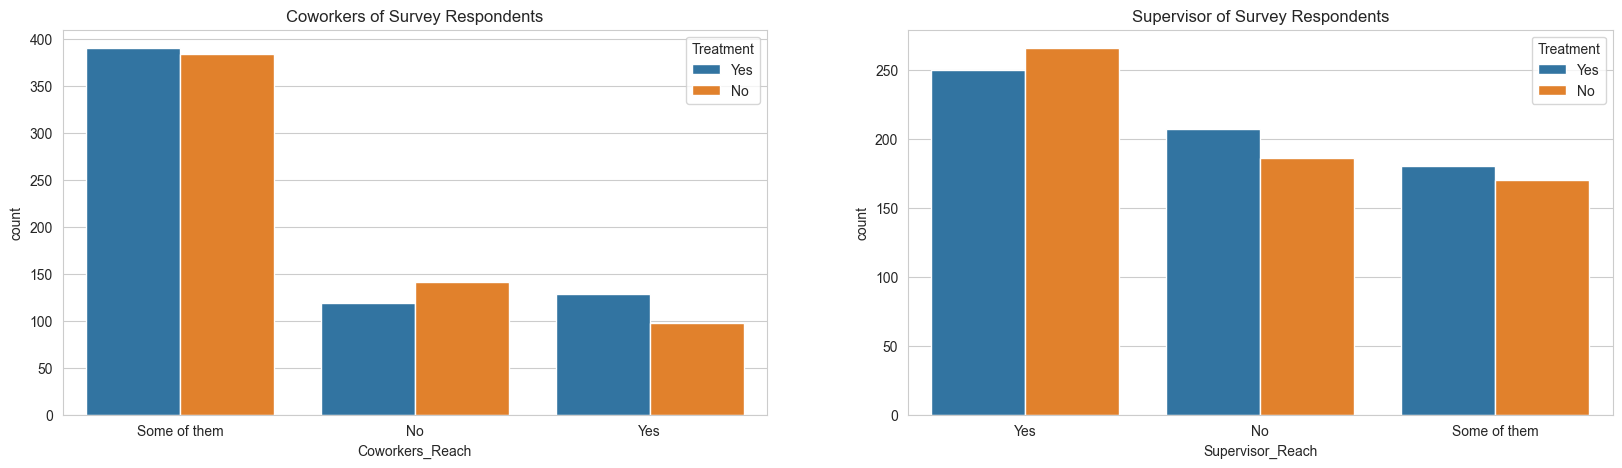

In [27]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(x = mhdata['Coworkers_Reach'], hue = mhdata['Treatment'])
plt.title('Coworkers of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Supervisor_Reach'], hue = mhdata['Treatment'])
plt.title('Supervisor of Survey Respondents')
plt.show()

Interestingly, survey shows more positive response with regards to opening up to supervisors than to peers. Respondents who reveal openness to reach out to supervisors are more likely to not get treatment than otherwise. There is no specific pattern with respect to openness to share to coworkers.

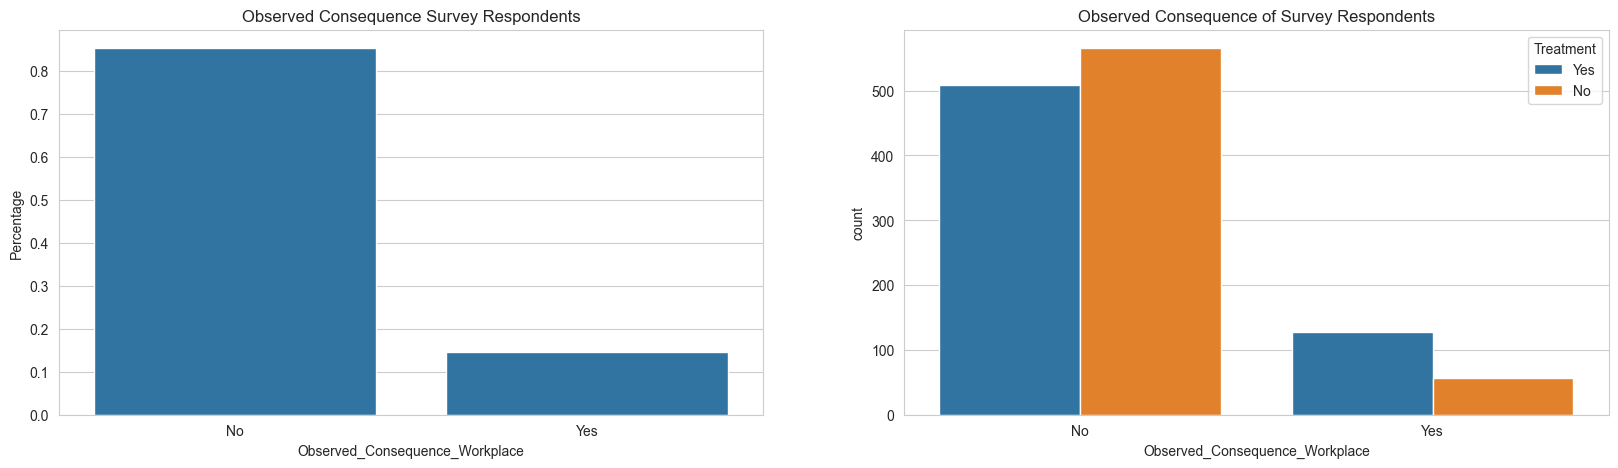

In [28]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Observed_Consequence_Workplace'].value_counts(normalize = True).rename_axis('Observed_Consequence_Workplace').reset_index(name = 'Percentage')
sns.barplot(x = 'Observed_Consequence_Workplace', y = 'Percentage', data = eda_percentage)
plt.title('Observed Consequence Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Observed_Consequence_Workplace'], hue = mhdata['Treatment'])
plt.title('Observed Consequence of Survey Respondents')
plt.show()

More than 80% respondent that they have not observed negative consequences from coworkers with mental health condition in the workplace. But respondents who say that they do observe negative consequences are more likely to seek medical treatment.

#### Workplace benefits, facilities, and confidentiality

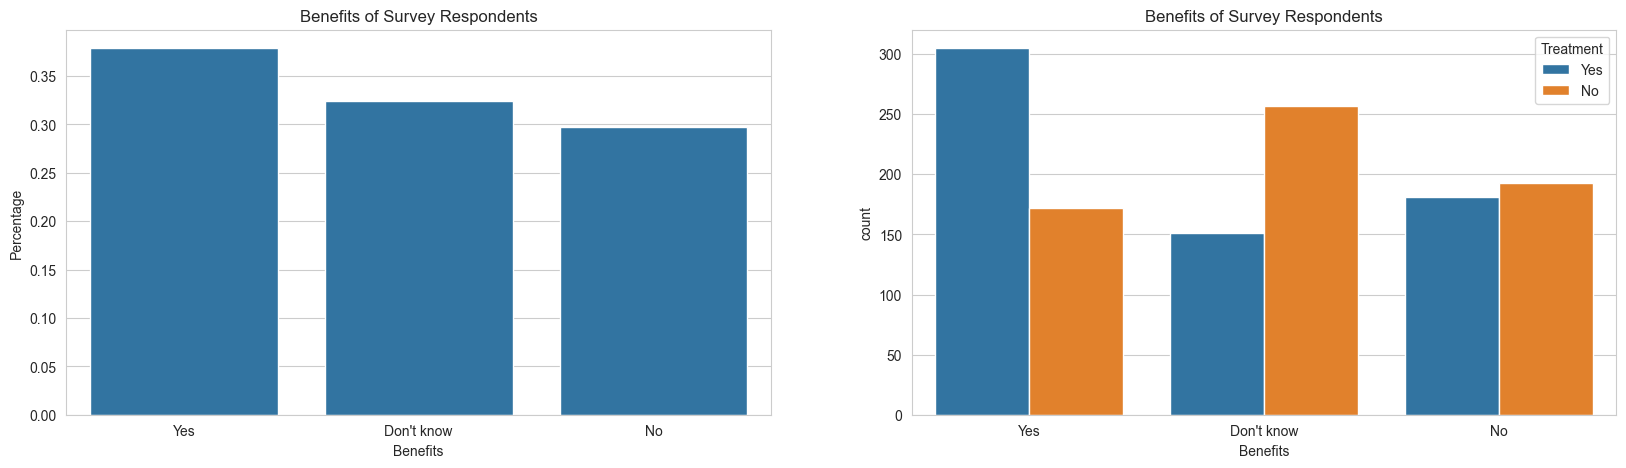

In [29]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Benefits'].value_counts(normalize = True).rename_axis('Benefits').reset_index(name = 'Percentage')
sns.barplot(x = 'Benefits', y = 'Percentage', data = eda_percentage)
plt.title('Benefits of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Benefits'], hue = mhdata['Treatment'])
plt.title('Benefits of Survey Respondents')
plt.show()

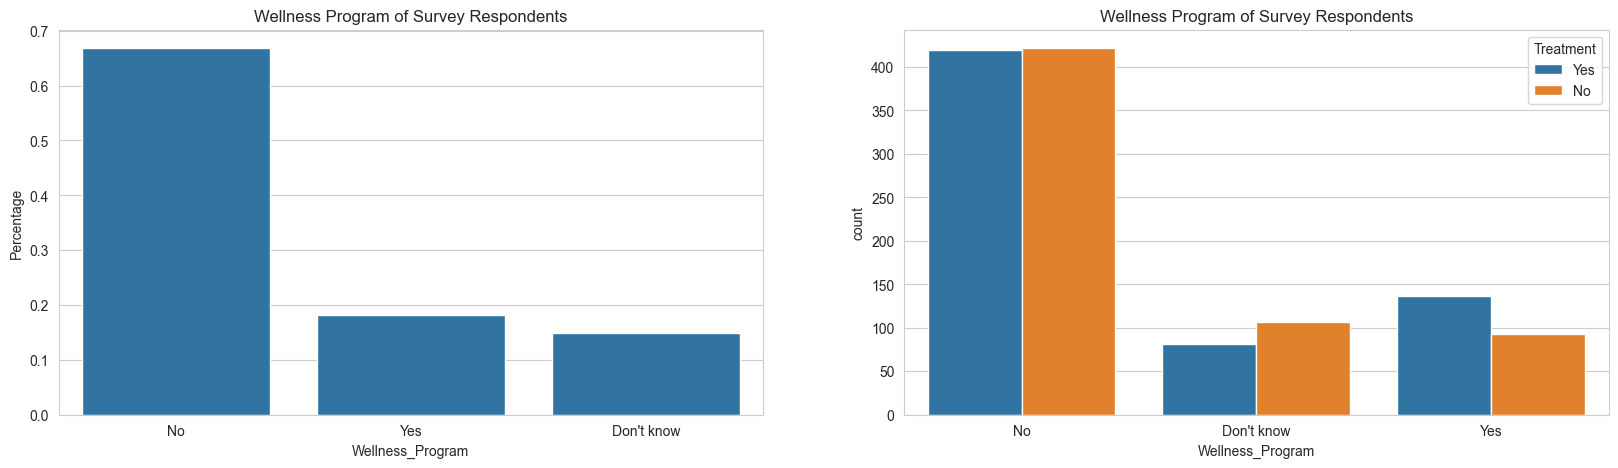

In [30]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Wellness_Program'].value_counts(normalize = True).rename_axis('Wellness_Program').reset_index(name = 'Percentage')
sns.barplot(x = 'Wellness_Program', y = 'Percentage', data = eda_percentage)
plt.title('Wellness Program of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Wellness_Program'], hue = mhdata['Treatment'])
plt.title('Wellness Program of Survey Respondents')
plt.show()

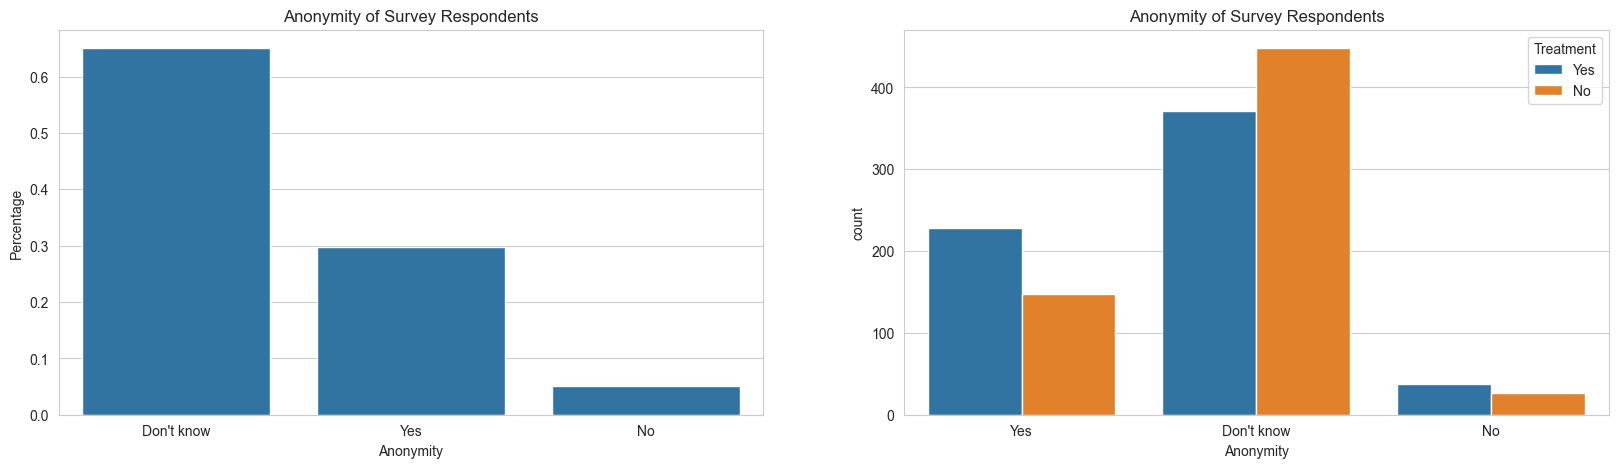

In [31]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Anonymity'].value_counts(normalize = True).rename_axis('Anonymity').reset_index(name = 'Percentage')
sns.barplot(x = 'Anonymity', y = 'Percentage', data = eda_percentage)
plt.title('Anonymity of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Anonymity'], hue = mhdata['Treatment'])
plt.title('Anonymity of Survey Respondents')
plt.show()

* It is revealed that only roughly 35% of the respondents are aware of the benefits present in their workplace and those who know are more likely to get medical treatment. The rest of the surveyees either are not aware of the said benefits or there non present. Those who responded otherwise are more likely to not get treatment than those who know the presence of the said benefits.
* Majority of the surveyees reveal the absence of wellness programs in the workplace.
* Majority of the respondents reveal that they are not aware if their identity is protected when consulting or assessing mental health in the workplace. This should not be taken lightly as those who responded that they are aware of the precautionary steps regarding their medical condition are more likely to seek medical condition than those who don't know.

### Data Pre-processing

In [32]:
mhdata['Treatment'] = np.where(mhdata['Treatment'] == 'Yes', 1, 0)

We now have converted the target variable into boolean values where: <br>

* 1 = Yes, to get medical treatment
* 2 = No, not getting any medical treatment

In [33]:
mhdata.sample(10)

,Age,Gender,Self_Employed,Family_History,Treatment,Work_Interfere,Employee_Count_Company,Remote_Work,Tech_Company,Benefits,Care_Options,Wellness_Program,Seek_Help,Anonymity,Medical_Leave,Mental_Health_Consequence,Physical_Health_Consequence,Coworkers_Reach,Supervisor_Reach,Mental_Health_Interview,Physical_Health_Interview,Mental_VS_Physical,Observed_Consequence_Workplace
484,48,Male,No,No,0,Never,6-25,No,Yes,Don't know,No,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,Maybe,Don't know,No
601,35,Male,Yes,Yes,0,NaN,6-25,Yes,Yes,No,No,Yes,Yes,Don't know,Very easy,No,No,Yes,Yes,No,Maybe,Yes,No
312,36,Male,Yes,No,1,Never,1-5,No,Yes,No,Yes,No,No,Don't know,Somewhat easy,Maybe,No,Some of them,Yes,No,No,Yes,No
277,28,Male,No,No,0,Sometimes,6-25,No,Yes,No,Yes,No,No,Don't know,Somewhat easy,Maybe,Maybe,No,Some of them,No,No,Don't know,No
439,29,Male,No,Yes,1,Rarely,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No
404,29,Male,No,Yes,1,Sometimes,26-100,No,Yes,Don't know,No,No,No,Don't know,Very easy,Maybe,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
359,29,Male,Yes,No,0,NaN,1-5,Yes,Yes,No,Yes,No,No,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No
316,29,Male,No,No,0,NaN,100-500,No,No,Don't know,Not sure,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,Maybe,Don't know,No
351,27,Male,No,No,1,Sometimes,More than 1000,No,Yes,Yes,Yes,Yes,Yes,Yes,Don't know,No,No,No,No,No,Yes,Yes,No
489,33,Male,No,No,0,Never,6-25,No,No,No,No,No,No,Don't know,Don't know,Maybe,Maybe,Some of them,Some of them,No,No,No,No


In [34]:
# Now, we separate our dependent and independent variables.
X = mhdata.drop(["Treatment"], axis=1)
Y = mhdata["Treatment"]

# The independent variables will be transformed into dummy variables
X = pd.get_dummies(X, drop_first=True)

# adding constant. This is a requirement of Stats Model library. It creates a new column with float value 1
X = sm.add_constant(X)

In [35]:
# Let's see how X looks like with the dummy variables
X.head()

,const,Age,Gender_Male,Gender_Queer,Self_Employed_Yes,Family_History_Yes,Work_Interfere_Often,Work_Interfere_Rarely,Work_Interfere_Sometimes,Employee_Count_Company_100-500,Employee_Count_Company_26-100,Employee_Count_Company_500-1000,Employee_Count_Company_6-25,Employee_Count_Company_More than 1000,Remote_Work_Yes,Tech_Company_Yes,Benefits_No,Benefits_Yes,Care_Options_Not sure,Care_Options_Yes,Wellness_Program_No,Wellness_Program_Yes,Seek_Help_No,Seek_Help_Yes,Anonymity_No,Anonymity_Yes,Medical_Leave_Somewhat difficult,Medical_Leave_Somewhat easy,Medical_Leave_Very difficult,Medical_Leave_Very easy,Mental_Health_Consequence_No,Mental_Health_Consequence_Yes,Physical_Health_Consequence_No,Physical_Health_Consequence_Yes,Coworkers_Reach_Some of them,Coworkers_Reach_Yes,Supervisor_Reach_Some of them,Supervisor_Reach_Yes,Mental_Health_Interview_No,Mental_Health_Interview_Yes,Physical_Health_Interview_No,Physical_Health_Interview_Yes,Mental_VS_Physical_No,Mental_VS_Physical_Yes,Observed_Consequence_Workplace_Yes
0,1.0,37,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,True,False,True,False,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,True,True,False,False,False,False,True,False
1,1.0,44,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False
2,1.0,32,True,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,False,True,True,False,False
3,1.0,31,True,False,False,True,True,False,False,False,True,False,False,False,False,True,True,False,False,True,True,False,True,False,True,False,True,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,True,False,True
4,1.0,31,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,False


In [36]:
# checking the shape of our predictor for treatment
X.shape

(1259, 45)

From 26 independent variables, replacing them with dummy variables expanded the columns to 45

In [37]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [38]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

### Check model performance on training and test set

In [39]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")

In [40]:
# Decision Tree Modeling
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [41]:
dTree_model_train_perf = model_performance_classification(
    dTree, X_train, y_train
)
print("Training performance:\n", dTree_model_train_perf)
dTree_model_test_perf = model_performance_classification(dTree, X_test, y_test)
print("Testing performance:\n", dTree_model_test_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.719577  0.709845    0.73262  0.721053


#### **An overfitted model!** Let's try to fix this.

In [42]:
# function to create Confusion matrix
def create_confusion_matrix(model, predictors, target, figsize=(5, 5)):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")

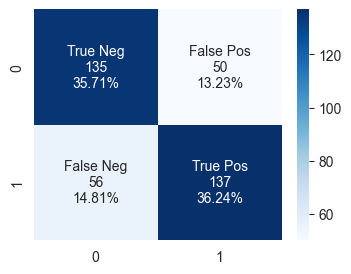

In [43]:
# Creating confusion matrix
create_confusion_matrix(dTree, X_test, y_test, figsize=(4, 3))

In [44]:
feature_names = list(X.columns)
print(feature_names)

['const', 'Age', 'Gender_Male', 'Gender_Queer', 'Self_Employed_Yes', 'Family_History_Yes', 'Work_Interfere_Often', 'Work_Interfere_Rarely', 'Work_Interfere_Sometimes', 'Employee_Count_Company_100-500', 'Employee_Count_Company_26-100', 'Employee_Count_Company_500-1000', 'Employee_Count_Company_6-25', 'Employee_Count_Company_More than 1000', 'Remote_Work_Yes', 'Tech_Company_Yes', 'Benefits_No', 'Benefits_Yes', 'Care_Options_Not sure', 'Care_Options_Yes', 'Wellness_Program_No', 'Wellness_Program_Yes', 'Seek_Help_No', 'Seek_Help_Yes', 'Anonymity_No', 'Anonymity_Yes', 'Medical_Leave_Somewhat difficult', 'Medical_Leave_Somewhat easy', 'Medical_Leave_Very difficult', 'Medical_Leave_Very easy', 'Mental_Health_Consequence_No', 'Mental_Health_Consequence_Yes', 'Physical_Health_Consequence_No', 'Physical_Health_Consequence_Yes', 'Coworkers_Reach_Some of them', 'Coworkers_Reach_Yes', 'Supervisor_Reach_Some of them', 'Supervisor_Reach_Yes', 'Mental_Health_Interview_No', 'Mental_Health_Interview_Yes

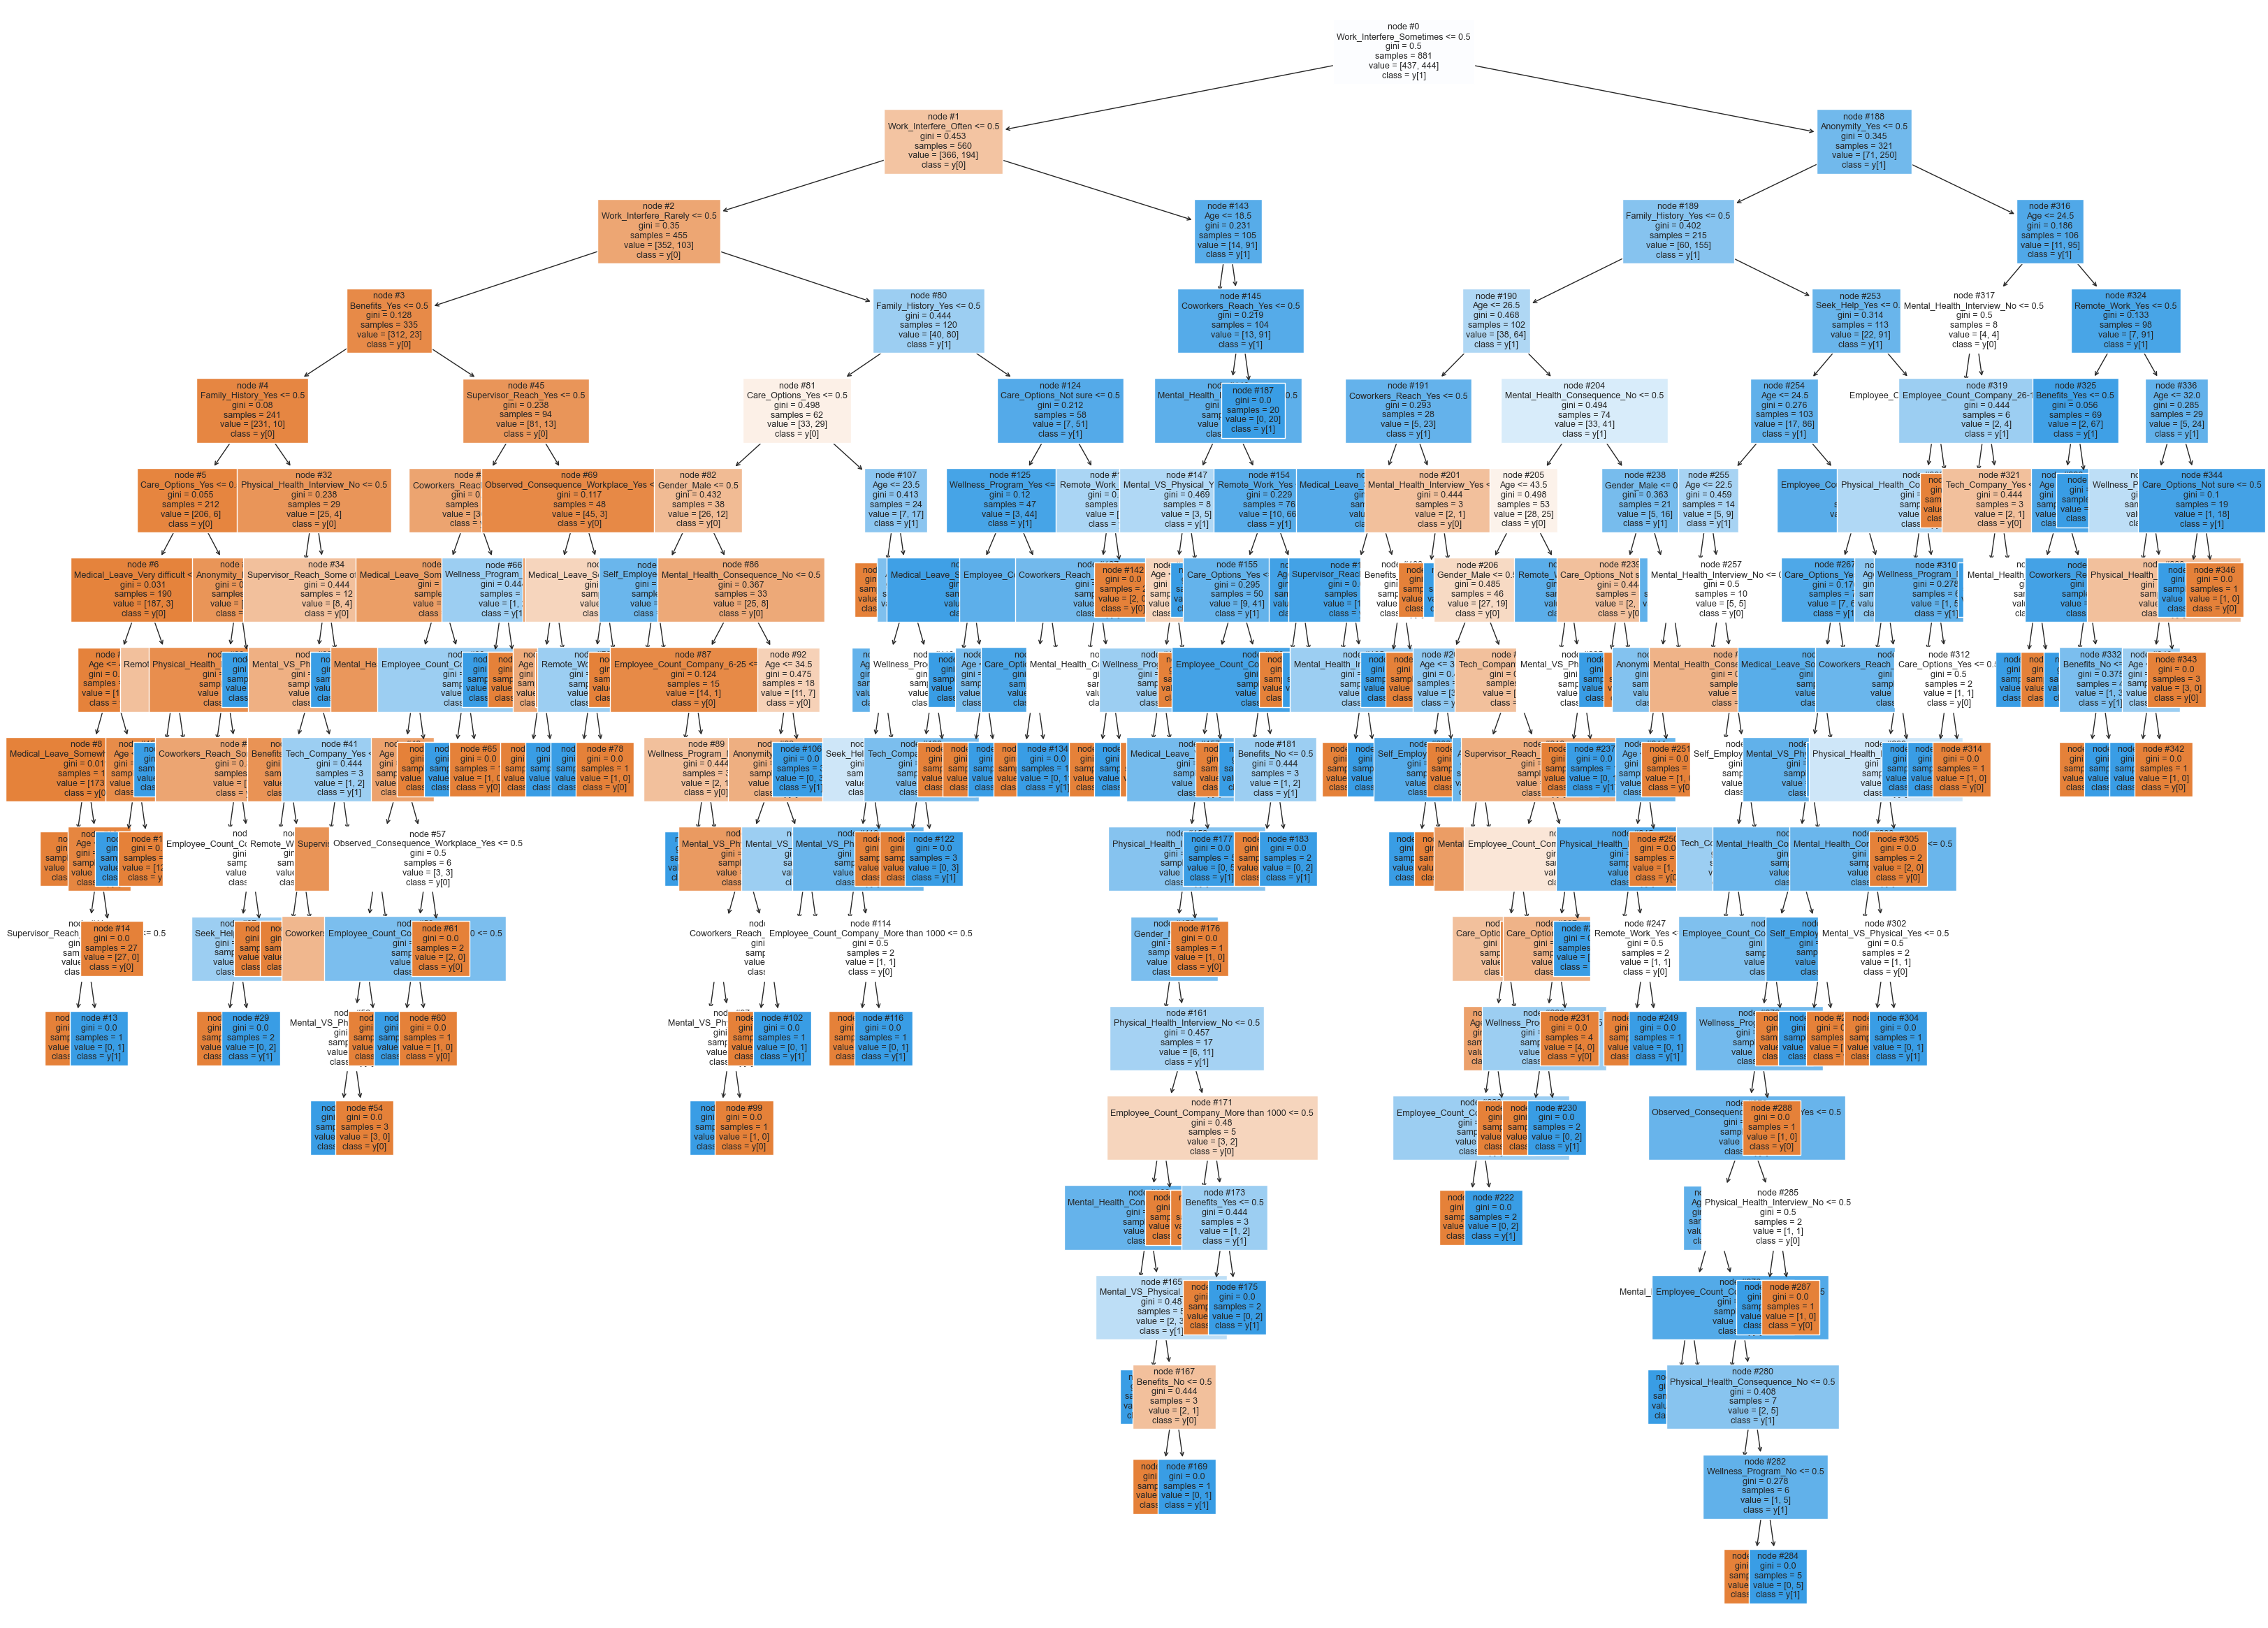

In [45]:
plt.figure(figsize=(40, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

 #### The decision tree model is very robust and hard to identify so a text version will be called

We have a lot of variables so this is really hard to decipher.

In [46]:
# Printing feature importances
print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                            Imp
Work_Interfere_Sometimes               0.173211
Work_Interfere_Often                   0.158811
Work_Interfere_Rarely                  0.143464
Age                                    0.102872
Family_History_Yes                     0.032140
Care_Options_Yes                       0.029858
Wellness_Program_No                    0.022249
Remote_Work_Yes                        0.020174
Mental_VS_Physical_No                  0.020010
Tech_Company_Yes                       0.018228
Physical_Health_Interview_No           0.017880
Mental_Health_Interview_No             0.017407
Gender_Male                            0.016630
Benefits_No                            0.015703
Employee_Count_Company_26-100          0.015643
Mental_Health_Consequence_Yes          0.013898
Self_Employed_Yes                      0.013281
Coworkers_Reach_Some of them           0.013153
Anonymity_Yes                          0.012630
Seek_Help_Yes                          0

We can see that work interference, age, family history, care options, and wellness program are the most important features of the model.

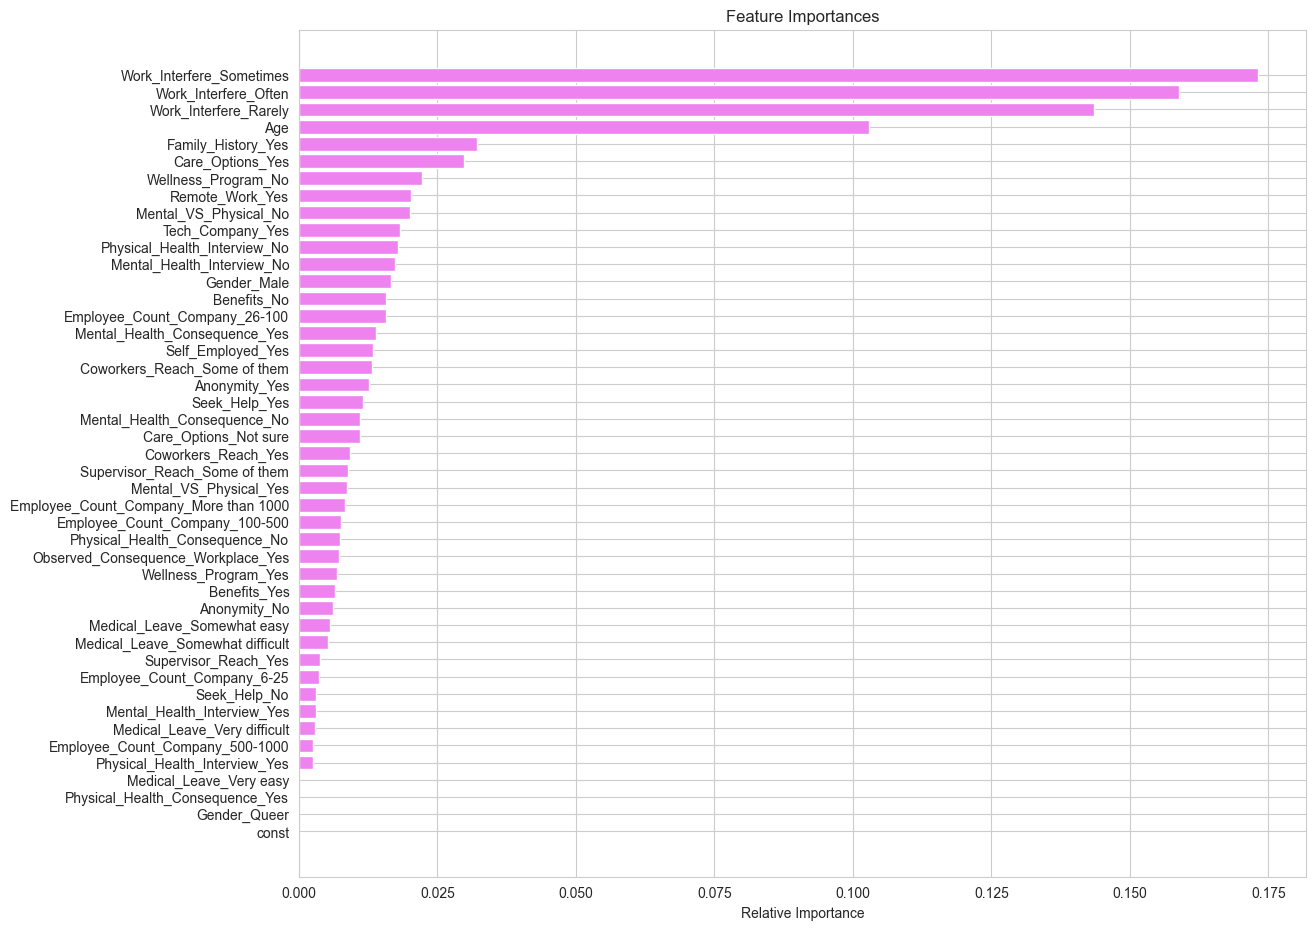

In [47]:
# Loading feature importance in a graph to get a better understanding
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(13, 11))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## VI. Tuned Decision Tree Model

### Reducing the overfitting problem

In [48]:
# Let's reduce our depth to 4, the previous decision tree model looked too overwhelming
dTree_short = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=1)
dTree_short.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

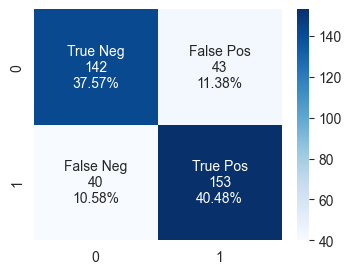

In [49]:
create_confusion_matrix(dTree_short, X_test, y_test, figsize=(4, 3))

In [50]:
# Calculating different metrics
dTree_short_model_train_perf = model_performance_classification(
    dTree_short, X_train, y_train
)
print("Training performance:\n", dTree_short_model_train_perf)
dTree_short_model_test_perf = model_performance_classification(dTree_short, X_test, y_test)
print("Testing performance:\n", dTree_short_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.839955  0.871622   0.821656  0.845902
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.780423  0.792746   0.780612  0.786632


#### We were able to solve the overfitting model but the results show poorer performance than our logistic regression. This model is not that good

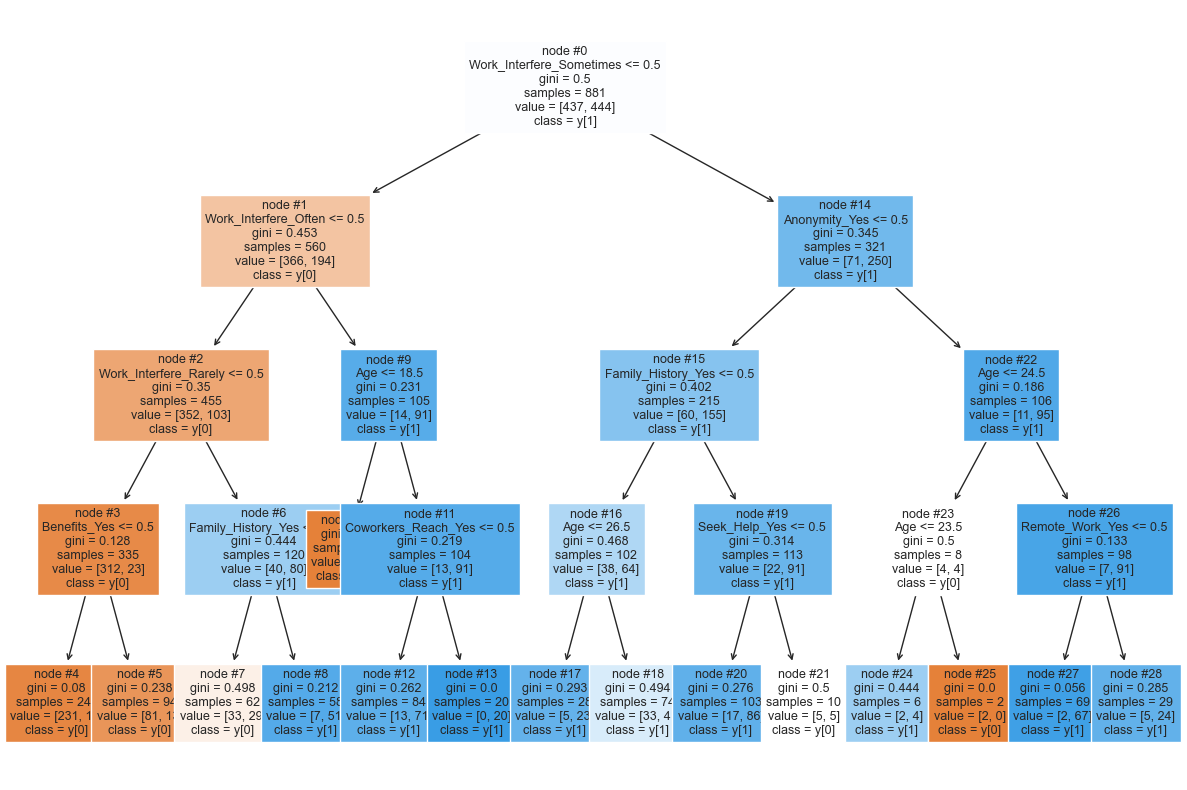

In [51]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    dTree_short,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [52]:
print(tree.export_text(dTree_short, feature_names=feature_names, show_weights=False))

|--- Work_Interfere_Sometimes <= 0.50
|   |--- Work_Interfere_Often <= 0.50
|   |   |--- Work_Interfere_Rarely <= 0.50
|   |   |   |--- Benefits_Yes <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Benefits_Yes >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Work_Interfere_Rarely >  0.50
|   |   |   |--- Family_History_Yes <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Family_History_Yes >  0.50
|   |   |   |   |--- class: 1
|   |--- Work_Interfere_Often >  0.50
|   |   |--- Age <= 18.50
|   |   |   |--- class: 0
|   |   |--- Age >  18.50
|   |   |   |--- Coworkers_Reach_Yes <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Coworkers_Reach_Yes >  0.50
|   |   |   |   |--- class: 1
|--- Work_Interfere_Sometimes >  0.50
|   |--- Anonymity_Yes <= 0.50
|   |   |--- Family_History_Yes <= 0.50
|   |   |   |--- Age <= 26.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  26.50
|   |   |   |   |--- class: 1
|   |   |--- Family_History_Yes >  0.50
|   |   |   |--- Se

All models

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


Working With graphs

In [54]:
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}

# plot a bar chat to display the Accuracy
x_models_name=[]
models_accuracy=[]
models_recall=[]
models_precision=[]
models_f1_score=[]
table_list=[]
all_models=[]

In [55]:
#function for calculations
def calculations_fun(model,model_name):
  # accuracy score on the training data
  X_train_prediction = model.predict(X_train)
  training_data_accuracy = accuracy_score(X_train_prediction, y_train)
  print('Accuracy score of the training data : ', training_data_accuracy)
  # accuracy score on the test data
  X_test_prediction = model.predict(X_test)
  test_data_accuracy = accuracy_score(X_test_prediction, y_test)
  print('Accuracy score of the test data : ', test_data_accuracy)
  # for storing accuracy in dictionary
  methodDict[model_name] = test_data_accuracy * 100


  # precision score on the training data
  X_train_prediction = model.predict(X_train)
  training_data_precision = precision_score(X_train_prediction, y_train)
  print('\nPrecision of the training data : ', training_data_precision)
  # precision score on the test data
  X_test_prediction = model.predict(X_test)
  test_data_precision = precision_score(X_test_prediction, y_test)
  print('Precision of the test data : ', test_data_precision)


  # recall score on the training data
  X_train_prediction = model.predict(X_train)
  training_data_recall = recall_score(X_train_prediction, y_train)
  print('\nRecall of the training data : ', training_data_recall)
  # recall score on the test data
  X_test_prediction = model.predict(X_test)
  test_data_recall = recall_score(X_test_prediction, y_test)
  print('Recall of the test data : ', test_data_recall)


  # f1_score on the training data
  X_train_prediction = model.predict(X_train)
  training_data_f1_score = f1_score(X_train_prediction, y_train)
  print('\nf1_score of the training data : ', training_data_f1_score)
  # f1_score on the test data
  X_test_prediction = model.predict(X_test)
  test_data_f1_score = f1_score(X_test_prediction, y_test)
  print('f1_score of the test data : ', test_data_f1_score)

  #for adding values inside list
  if model_name not in x_models_name:
    x_models_name.append(model_name)
    all_models.append(model)
    models_accuracy.append(100*test_data_accuracy)
    models_recall.append(100*test_data_recall)
    models_precision.append(100*test_data_precision)
    models_f1_score.append(100*test_data_f1_score)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Trainig Accuracy": round(100*training_data_accuracy,2),
            "Testing Accuracy": round(100*test_data_accuracy,2),
            "Recall": round(100*test_data_recall,2),
            "Precision": round(100*test_data_precision,2),
            "F1": round(100*test_data_f1_score,2),
        },
        index=[0],
    ).T
    table_list.append(df_perf)


In [56]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1]}
# SVM with tuned parameters using GridSearchCV
svm_model = GridSearchCV(svm.SVC(probability=True), param_grid, cv=5)
svm_model.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", svm_model.best_params_)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

calculations_fun(svm_model,"SVM model")

Best Parameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 82.28%
Accuracy score of the training data :  0.8547105561861521
Accuracy score of the test data :  0.8227513227513228

Precision of the training data :  0.9481981981981982
Precision of the test data :  0.917098445595855

Recall of the training data :  0.8003802281368821
Recall of the test data :  0.7763157894736842

f1_score of the training data :  0.868041237113402
f1_score of the test data :  0.840855106888361


In [57]:
param_grid= {'C': [0.1, 1, 10], 'kernel': ['linear'], 'gamma': [0.01, 0.1, 1]}
svm_model = GridSearchCV(svm.SVC(probability=True), param_grid, cv=5)

In [58]:
# Example with K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

calculations_fun(knn_model,"K-Nearest(KNN)")

KNN Accuracy: 0.6798941798941799
Accuracy score of the training data :  0.7741203178206584
Accuracy score of the test data :  0.6798941798941799

Precision of the training data :  0.6734234234234234
Precision of the test data :  0.5854922279792746

Recall of the training data :  0.8470254957507082
Recall of the test data :  0.7337662337662337

f1_score of the training data :  0.7503136762860729
f1_score of the test data :  0.6512968299711815


In [59]:
# Example with Multi-layer Perceptron (MLP)
mlp_model = MLPClassifier(max_iter=1000,random_state=1)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp}")

calculations_fun(mlp_model,"Multi-layer Perceptron (MLP)")

MLP Accuracy: 0.8042328042328042
Accuracy score of the training data :  0.9375709421112373
Accuracy score of the test data :  0.8042328042328042

Precision of the training data :  0.9594594594594594
Precision of the test data :  0.8497409326424871

Recall of the training data :  0.9200863930885529
Recall of the test data :  0.784688995215311

f1_score of the training data :  0.9393605292171995
f1_score of the test data :  0.8159203980099502


In [60]:
# from sklearn.linear_model import LogisticRegression
# lr_model=LogisticRegression(random_state=1)
# lr_model.fit(X_train, y_train)

# calculations_fun(lr_model,"LogisticRegression")


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=1)

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(lr_model, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train Logistic Regression model with the best hyperparameters
lr_model_best = LogisticRegression(random_state=1, **best_params)
lr_model_best.fit(X_train, y_train)

# Calculate predictions on the test set
y_pred_lr = lr_model_best.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

# Calculate and display evaluation metrics
calculations_fun(lr_model_best, "Logistic Regression")


Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.8068783068783069
Accuracy score of the training data :  0.8467650397275823
Accuracy score of the test data :  0.8068783068783069

Precision of the training data :  0.9144144144144144
Precision of the test data :  0.8756476683937824

Recall of the training data :  0.8071570576540755
Recall of the test data :  0.7752293577981652

f1_score of the training data :  0.8574445617740232
f1_score of the test data :  0.8223844282238443


In [61]:
# Example with Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=1)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")

calculations_fun(gb_model,"Gradient Boosting")

Gradient Boosting Accuracy: 0.8068783068783069
Accuracy score of the training data :  0.8898978433598184
Accuracy score of the test data :  0.8068783068783069

Precision of the training data :  0.9279279279279279
Precision of the test data :  0.8652849740932642

Recall of the training data :  0.8637316561844863
Recall of the test data :  0.780373831775701

f1_score of the training data :  0.8946796959826276
f1_score of the test data :  0.8206388206388207


In [62]:
# Decision Tree Modeling
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

calculations_fun(dTree,"Decision Tree")

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.7195767195767195

Precision of the training data :  1.0
Precision of the test data :  0.7098445595854922

Recall of the training data :  1.0
Recall of the test data :  0.732620320855615

f1_score of the training data :  1.0
f1_score of the test data :  0.7210526315789473


AdaBoostClassifier

In [63]:
from sklearn.ensemble import AdaBoostClassifier
# Building and fitting
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
boost.fit(X_train, y_train)

calculations_fun(boost,"AdaBoostClassifier")

Accuracy score of the training data :  0.8456299659477866
Accuracy score of the test data :  0.8121693121693122

Precision of the training data :  0.8896396396396397
Precision of the test data :  0.8497409326424871

Recall of the training data :  0.8195020746887967
Recall of the test data :  0.7961165048543689

f1_score of the training data :  0.8531317494600433
f1_score of the test data :  0.8220551378446115


In [64]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier

# Initialize the base classifiers
base_classifiers = [('SVM',svm_model),('LogisticRegression',lr_model),('AdaBoostClassifier',boost),('GradientBoostingClassifier',gb_model),('MLPClassifier',mlp_model),('DecisionTreeClassifier',dTree),('KNN_Classifier',knn_model)]


# Create a meta-classifier
# Initialize the meta-classifier
meta_classifier = svm_model

stack = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)
stack.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stack.predict(X_test)

# Calculate accuracy
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking}")

calculations_fun(stack,"StackingClassifier")



Stacking Classifier Accuracy: 0.828042328042328
Accuracy score of the training data :  0.8320090805902384
Accuracy score of the test data :  0.828042328042328

Precision of the training data :  0.9481981981981982
Precision of the test data :  0.9430051813471503

Recall of the training data :  0.7710622710622711
Recall of the test data :  0.7711864406779662

f1_score of the training data :  0.8505050505050504
f1_score of the test data :  0.8484848484848486


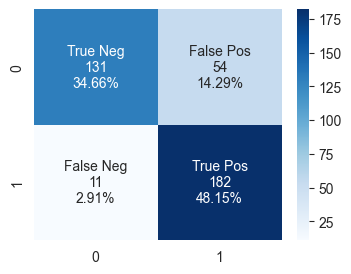

In [65]:
# Creating confusion matrix
create_confusion_matrix(stack, X_test, y_test, figsize=(4, 3))

Bar graph plot

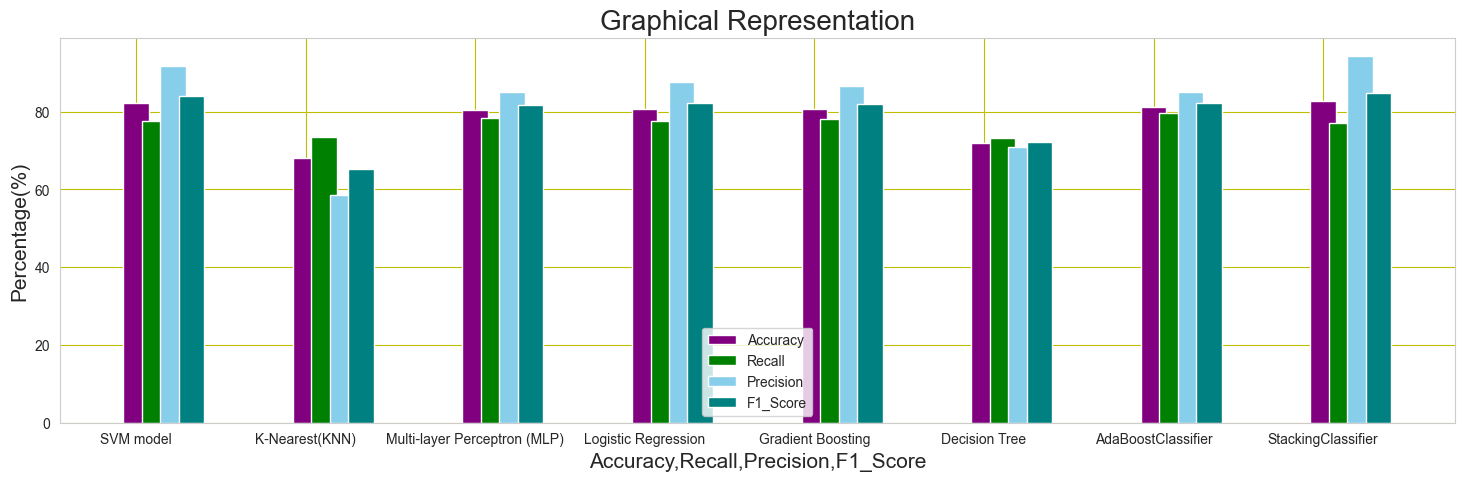

In [66]:
# plot a bar chat to display the Accuracy
plt.figure(figsize=(18,5))
x_index=np.arange(len(x_models_name))
width=0.109
plt.bar(x_models_name,models_accuracy,color="purple",width=0.15,label="Accuracy")
plt.bar(x_index+width,models_recall,color="green",width=0.15,label="Recall")
plt.bar(x_index+width+width,models_precision,color="skyblue",width=0.15,label="Precision")
plt.bar(x_index+width+width+width,models_f1_score,color="teal",width=0.15,label="F1_Score")

plt.legend()
plt.xlabel("Accuracy,Recall,Precision,F1_Score",fontsize=15)
plt.ylabel("Percentage(%)",fontsize=15)
plt.title("Graphical Representation",fontsize=20)
plt.grid(color="y")

Roc Curve

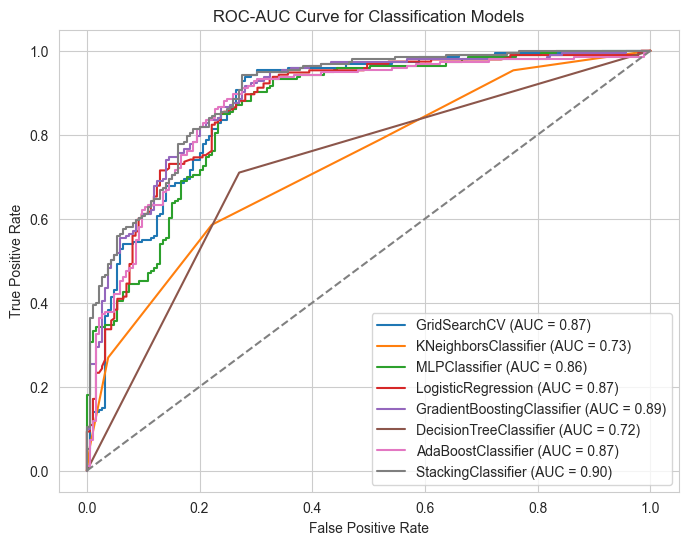

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize the models
models = all_models

# Plot ROC-AUC curves for each model
plt.figure(figsize=(8, 6))

for model in models:
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Set plot properties
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Classification Models')
plt.legend()
plt.grid(True)
plt.show()


Accuracy plot

In [68]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([50.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')

    plt.show()

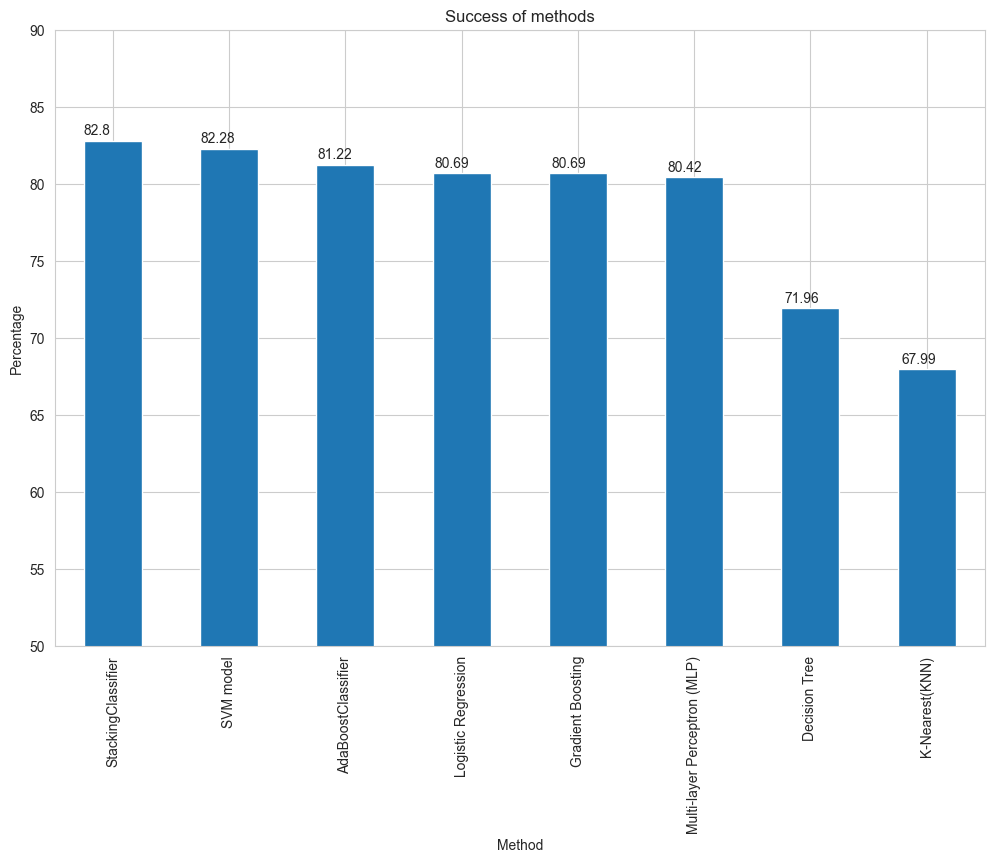

In [69]:
plotSuccess()

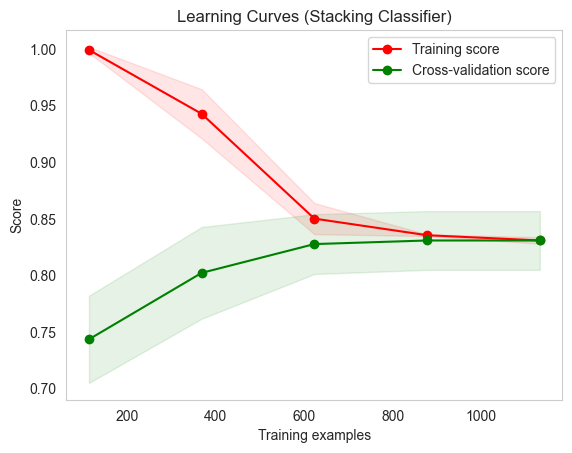

In [70]:
from sklearn.model_selection import learning_curve
# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
plot_learning_curve(stack, "Learning Curves (Stacking Classifier)", X, Y, cv=10, n_jobs=-1)
plt.show()

## VII. Testing and Conclusion

Let's test our models using a hypothetical employee

In [71]:
new_respondent = pd.DataFrame([{
    'const': 1,
    'Age': 27,
    'Gender_Male': 0,
    'Gender_Queer': 0,
    'Self_Employed_Yes': 0,
    'Family_History_Yes': 1,
    'Work_Interfere_Often': 0,
    'Work_Interfere_Rarely': 0,
    'Work_Interfere_Sometimes': 1,
    'Employee_Count_Company_100-500': 0,
    'Employee_Count_Company_26-100': 1,
    'Employee_Count_Company_500-1000': 0,
    'Employee_Count_Company_6-25': 0,
    'Employee_Count_Company_More than 1000': 0,
    'Remote_Work_Yes': 1,
    'Tech_Company_Yes': 1,
    'Benefits_No': 0,
    'Benefits_Yes': 1,
    'Care_Options_Not sure': 0,
    'Care_Options_Yes': 1,
    'Wellness_Program_No': 1,
    'Wellness_Program_Yes': 0,
    'Seek_Help_No': 0,
    'Seek_Help_Yes': 1,
    'Anonymity_No': 0,
    'Anonymity_Yes': 1,
    'Medical_Leave_Somewhat difficult': 0,
    'Medical_Leave_Somewhat easy': 0,
    'Medical_Leave_Very difficult': 0,
    'Medical_Leave_Very easy': 1,
    'Mental_Health_Consequence_No': 0,
    'Mental_Health_Consequence_Yes': 0,
    'Physical_Health_Consequence_No': 0,
    'Physical_Health_Consequence_Yes': 0,
    'Coworkers_Reach_Some of them': 0,
    'Coworkers_Reach_Yes': 1,
    'Supervisor_Reach_Some of them': 0,
    'Supervisor_Reach_Yes': 0,
    'Mental_Health_Interview_No': 0,
    'Mental_Health_Interview_Yes': 0,
    'Physical_Health_Interview_No': 0,
    'Physical_Health_Interview_Yes': 0,
    'Mental_VS_Physical_No': 0,
    'Mental_VS_Physical_Yes': 1,
    'Observed_Consequence_Workplace_Yes': 0,


}],columns=[
    'const',
    'Age',
    'Gender_Male',
    'Gender_Queer',
    'Self_Employed_Yes',
    'Family_History_Yes',
    'Work_Interfere_Often',
    'Work_Interfere_Rarely',
    'Work_Interfere_Sometimes',
    'Employee_Count_Company_100-500',
    'Employee_Count_Company_26-100',
    'Employee_Count_Company_500-1000',
    'Employee_Count_Company_6-25',
    'Employee_Count_Company_More than 1000',
    'Remote_Work_Yes',
    'Tech_Company_Yes',
    'Benefits_No',
    'Benefits_Yes',
    'Care_Options_Not sure',
    'Care_Options_Yes',
    'Wellness_Program_No',
    'Wellness_Program_Yes',
    'Seek_Help_No',
    'Seek_Help_Yes',
    'Anonymity_No',
    'Anonymity_Yes',
    'Medical_Leave_Somewhat difficult',
    'Medical_Leave_Somewhat easy',
    'Medical_Leave_Very difficult',
    'Medical_Leave_Very easy',
    'Mental_Health_Consequence_No',
    'Mental_Health_Consequence_Yes',
    'Physical_Health_Consequence_No',
    'Physical_Health_Consequence_Yes',
    'Coworkers_Reach_Some of them',
    'Coworkers_Reach_Yes',
    'Supervisor_Reach_Some of them',
    'Supervisor_Reach_Yes',
    'Mental_Health_Interview_No',
    'Mental_Health_Interview_Yes',
    'Physical_Health_Interview_No',
    'Physical_Health_Interview_Yes',
    'Mental_VS_Physical_No',
    'Mental_VS_Physical_Yes',
    'Observed_Consequence_Workplace_Yes',],)
new_respondent

,const,Age,Gender_Male,Gender_Queer,Self_Employed_Yes,Family_History_Yes,Work_Interfere_Often,Work_Interfere_Rarely,Work_Interfere_Sometimes,Employee_Count_Company_100-500,Employee_Count_Company_26-100,Employee_Count_Company_500-1000,Employee_Count_Company_6-25,Employee_Count_Company_More than 1000,Remote_Work_Yes,Tech_Company_Yes,Benefits_No,Benefits_Yes,Care_Options_Not sure,Care_Options_Yes,Wellness_Program_No,Wellness_Program_Yes,Seek_Help_No,Seek_Help_Yes,Anonymity_No,Anonymity_Yes,Medical_Leave_Somewhat difficult,Medical_Leave_Somewhat easy,Medical_Leave_Very difficult,Medical_Leave_Very easy,Mental_Health_Consequence_No,Mental_Health_Consequence_Yes,Physical_Health_Consequence_No,Physical_Health_Consequence_Yes,Coworkers_Reach_Some of them,Coworkers_Reach_Yes,Supervisor_Reach_Some of them,Supervisor_Reach_Yes,Mental_Health_Interview_No,Mental_Health_Interview_Yes,Physical_Health_Interview_No,Physical_Health_Interview_Yes,Mental_VS_Physical_No,Mental_VS_Physical_Yes,Observed_Consequence_Workplace_Yes
0,1,27,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [72]:
predictionlg = stack.predict(new_respondent)
# print('Prediction:', round(predictionlg[0]))

Testing all of our models, this sample respondent is identified as "yes, needs treatment"

### Comparing the models

In [73]:
# testing performance comparison

models_test_comp_df = pd.concat(table_list,
    axis=1,
)
models_test_comp_df.columns = x_models_name

# Transpose the DataFrame
models_test_comp_df_transposed = models_test_comp_df.transpose()

# Print the transposed DataFrame
print("Transposed Testing Performance Comparison:")
models_test_comp_df_transposed


Transposed Testing Performance Comparison:


,Trainig Accuracy,Testing Accuracy,Recall,Precision,F1
SVM model,85.47,82.28,77.63,91.71,84.09
K-Nearest(KNN),77.41,67.99,73.38,58.55,65.13
Multi-layer Perceptron (MLP),93.76,80.42,78.47,84.97,81.59
Logistic Regression,84.68,80.69,77.52,87.56,82.24
Gradient Boosting,88.99,80.69,78.04,86.53,82.06
Decision Tree,100.00,71.96,73.26,70.98,72.11
AdaBoostClassifier,84.56,81.22,79.61,84.97,82.21
StackingClassifier,83.20,82.80,77.12,94.30,84.85
